## Introduction to Scikit-Learn

0. An end-end Scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. improve the model
6. Save and load a trained model
7. Putting it all together

In [1]:
##standards imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

## 0. An end to end Sckit-learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix) has every column except the target column
X = heart_disease.drop("target",axis=1)

# Create y (labels)
y=heart_disease["target"]

In [4]:
X,y


(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [5]:
# 2. Choose the right model and hyperparameters

#  RandomForestClassifier is a classification machine learning model
#  It works by building multiple decision trees and combining their outputs to make a final prediction — this approach is called ensemble learning.
#  For classification, the final prediction is made by majority voting from all the trees.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we 'll keep the deffault parameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [6]:
clf.fit(X_train,y_train);

In [7]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2


In [8]:
# make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [10]:
y_test

108    1
5      1
191    0
95     1
126    1
      ..
252    0
0      1
124    1
287    0
226    0
Name: target, Length: 61, dtype: int64

In [11]:
 #4. Evaluate the model on the training data and test data

clf.score(X_train,y_train)

1.0

In [12]:
clf.score(X_test,y_test)

0.8524590163934426

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [14]:
confusion_matrix(y_test,y_preds)

array([[23,  5],
       [ 4, 29]])

In [15]:
accuracy_score(y_test,y_preds)

0.8524590163934426

In [16]:
#5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators. . . .")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}")
                              

Trying model with 10 estimators. . . .
Model accuracy on test set: 83.61
Trying model with 20 estimators. . . .
Model accuracy on test set: 85.25
Trying model with 30 estimators. . . .
Model accuracy on test set: 80.33
Trying model with 40 estimators. . . .
Model accuracy on test set: 85.25
Trying model with 50 estimators. . . .
Model accuracy on test set: 78.69
Trying model with 60 estimators. . . .
Model accuracy on test set: 81.97
Trying model with 70 estimators. . . .
Model accuracy on test set: 85.25
Trying model with 80 estimators. . . .
Model accuracy on test set: 81.97
Trying model with 90 estimators. . . .
Model accuracy on test set: 85.25


In [17]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_l.pkl","wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_l.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8524590163934426

## GETTING THE DATA READY TO BE USED WITH MACHINE LEARNING

Three main things we have to do:

1. split the data into features and labels (usually 'X' & 'y')
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)
 

In [19]:


heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X= heart_disease.drop("target",axis=1)
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y=heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# Splitting data into training and test sets 
# Never evaluate or test your model on data that it is learned from

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)# test size determines the percentage of
                                                             # data that will be used for training set 


In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
#80% od data going to be the training set
X.shape[0]*.8
#242
#also 242+61=303

242.4

## 1.1 Making sure it's all numerical

In [25]:
import os
os.getcwd()

'C:\\Users\\quick\\Desktop\\ML-101'

In [26]:
car_sales=pd.read_csv("C:\\Users\\quick\\Desktop\\ML-101\\data\\car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
len(car_sales)


1000

In [28]:
 car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# Split into X/y
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

# split into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [30]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
#fitting the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [31]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] # here we treat doors as categorical even though doors have datatype int
one_hot = OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                              remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [32]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [33]:
#another method
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [34]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
model.score(X_test,y_test)

0.3235867221569877

## FEATURE SCALING
Feature Scaling ek technique hai jiska use machine learning mein tab kiya jaata hai jab aapke numerical data (numbers) ka range (value ka gap) alag-alag ho.
3 methods of feature scaling that are implemented in scikit-learn:

1. StandardScaler
2. MinMaxScaler
3. RobustScaler
4. Normalizer


## StandardScaler
The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

xi–mean(x)/stdev(x)

If data is not normally distributed, this is not the best scaler to use.

            x1        x2        x3
0     1.616535 -0.131753 -1.924757
1    -0.622285  0.218475 -0.146416
2    -0.538598 -0.361311 -0.820942
3    -1.084057 -0.838991 -0.192287
4     0.856675 -0.270204  1.045092
...        ...       ...       ...
9995  0.063263 -0.951512  0.707293
9996  0.479912  0.771862  0.569731
9997 -1.025161  2.396149 -0.069516
9998 -0.072557  0.872313 -1.274092
9999 -1.449402 -0.108902  0.358368

[10000 rows x 3 columns]


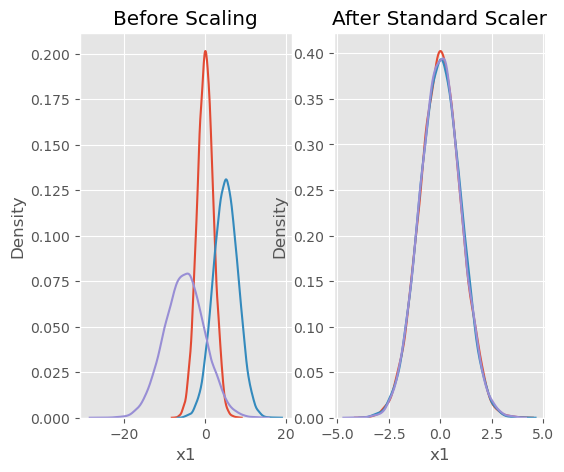

In [36]:
from sklearn import preprocessing

np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
print(scaled_df)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

## Min-Max Scaler
The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

xi–min(x)/max(x)–min(x)

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

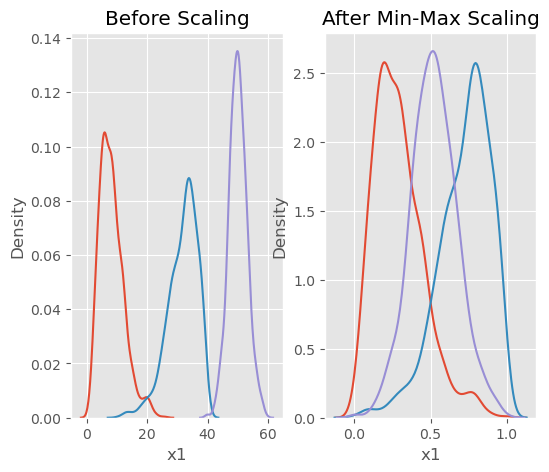

In [37]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

## Robust Scaler
The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:

xi–Q1(x)/Q3(x)–Q1(x)

For each feature.

Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.

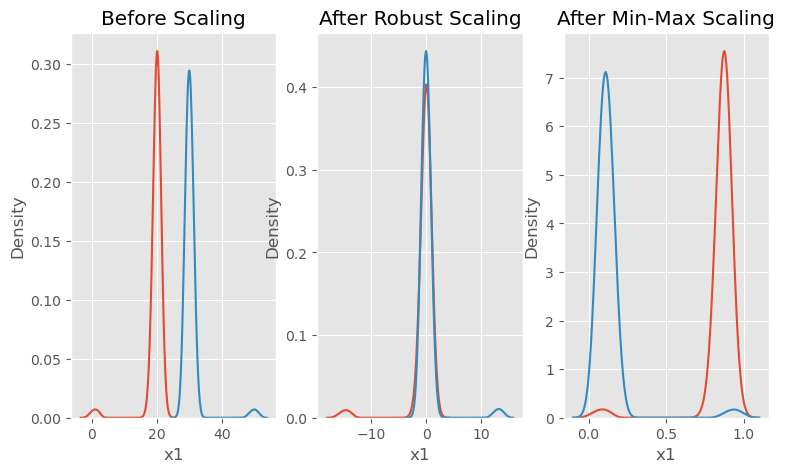

In [38]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

## Normalizer
The normalizer scales each value by dividing each value by its magnitude in n
-dimensional space for n
 number of features.

Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:

xi/√ (xi^2 + yi^2 + zi^2)

Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

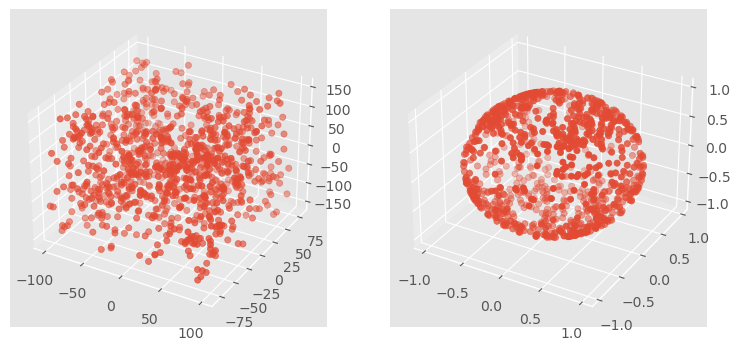

In [39]:
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

## What if there were missing values
1. Fill them with some values(also known as imputation)
2. Remove the samples with the missing data altogether

In [40]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
"""
    .isna()
    Checks each cell for missing values (NaN)
    Returns a DataFrame of the same shape, filled with True if a value is missing, else False.
    .isna()
    No parameters. Just writes df.isna()"""
"""
    sum()
    When applied to a DataFrame of booleans (True = 1, False = 0), .sum() returns the number of missing values per column.
    .sum(axis=0)
    Optional axis parameter:
    axis=0 (default): sums column-wise (downwards)
    axis=1: sums row-wise (across)

"""
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# Create X and y
"""
DataFrame.drop(
    labels=None, 
    axis=0, 
    index=None, 
    columns=None, 
    level=None, 
    inplace=False, 
    errors='raise'
)
Parameter	Meaning & Usage Example

labels   	Name of the row/column to drop
            df.drop('ColumnName', axis=1)
            axis 0 = rows, 1 = columns
            df.drop('row_label', axis=0)
            
index	    Alternative to labels when dropping rows
            df.drop(index=2)
            
columns	    Alternative to labels when dropping columns
            df.drop(columns='Price')
            
inplace	    True = changes original DataFrame
            False (default) = returns new DataFrame
            
errors	   'raise' (default): error if label not found
           'ignore': skip missing labels
"""



X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [43]:
# converting data into numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough"
                               )
"""
"one_hot" = name of the transformation step

one_hot = which transformer to use

categorical_features = which columns to apply it to

remainder="passthrough" = keep the other columns (like numeric ones) unchanged
"""

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [44]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

### Option 1: Fill the missing Data with Pandas

In [46]:
# Fill the "Make" column
# car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing.fillna({"Make":"missing"},inplace=True)

# # Fill the "Colour" column
# car_sales_missing["Colour"]=car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing.fillna({"Colour":"missing"},inplace=True)

# # Fill the "Odometer (KM)" column
# car_sales_missing["Odometer (KM)"]= car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing.fillna({"Odometer (KM)":"missing"},inplace=True)

# # Fill the "Doors" column
# car_sales_missing["Doors"] =car_sales_missing["Doors"].fillna(4, inplace=True)
car_sales_missing.fillna({"Doors":"missing"},inplace=True)

In [47]:
#check the data frame again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# Remove rows with missing Price Values
car_sales_missing.dropna(inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
len(car_sales_missing)

950

In [51]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

"""
OneHotEncoder() ka behavior:
Strings → "3", "4", "5" → Works fine (treats as categories).

Integers → 3, 4, 5 → Sometimes treats as continuous numbers or unknown type.

OneHotEncoder expects categorical data. Jab aap numeric data dete ho, wo sochta hai "shayad yeh numeric feature hai", especially jab values integer hon (e.g., 3, 4), not strings like "3".

"Odometer (KM)" was non-numeric
ML model/transformer can't handle text like "100,000 KM"	
pd.to_numeric() ne clean kiya
"""

In [52]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
car_sales_missing["Doors"] = car_sales_missing["Doors"].astype(str)
car_sales_missing["Odometer (KM)"] = pd.to_numeric(
    car_sales_missing["Odometer (KM)"], errors="coerce"
)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X=transformer.fit_transform(car_sales_missing)
#transformed_X
"""
hum transformed_X print kar rahe hai.

But wo scikit-learn ka sparse matrix object hai.

Isliye hume actual array values nahi, balki matrix ka summary output mil raha hai.

"""
transformed_X_dense = transformed_X.toarray()
print(transformed_X_dense)



[[0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 3.54310e+04
  1.53230e+04]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.92714e+05
  1.99430e+04]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 8.47140e+04
  2.83430e+04]
 ...
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 6.66040e+04
  3.15700e+04]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 2.15883e+05
  4.00100e+03]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 2.48360e+05
  1.27320e+04]]


### Option 2: Filling missing data and transforming categorical data with Scikit-Learn
it's best to fill and transform training and test sets separately (as shown in the code below).

The main takeaways:

1. Split your data first (into train/test)
2. Fill/transform the training set and test sets separately

In [53]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [54]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
# Drop the rows with no Label/Target (y)
"""dropna() → removes rows with missing values

subset=["Price"] → applies only to the Price column (label)
inplace=True means:
"Make the change directly in the original object" (no new copy is returned)."""

""""Remove all rows where the value in the Price column is missing."""

car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [56]:
# splitting the data into X and y

X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

# splitting the data into train and test
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [57]:
# Checking missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [58]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#define columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_features)
])

#fill train and test values separately
filled_X_train=imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

#check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], shape=(760, 4), dtype=object)


➡️ SimpleImputer:

Used to fill (impute) missing data in a column.
Strategy depend karta hai: 'mean', 'median', 'most_frequent', ya 'constant'.

➡️ ColumnTransformer:

Alag-alag columns ke liye alag transformations apply karne ke liye hota hai.
Jaise: categorical pe ek strategy, numerical pe doosri.

✅ cat_imputer:

Categorical columns (like 'Make', 'Colour') ke liye hai.
Agar koi value missing hai to 'missing' string se usse replace karega.

✅ door_imputer:

"Doors" column ke liye hai.
Missing value ko number 4 se replace karega.
Assumption: Mostly cars have 4 doors.

✅ num_imputer:

Numeric data ke liye (like "Odometer (KM)").
Missing values ko column ka average (mean) se fill karega.

✅ Columns ko alag-alag categories me divide kiya gaya:

cat_features: Categorical (string/text) data.
door_feature: Special categorical numeric type.
num_features: Pure numeric column.

✅ ColumnTransformer banaya jisme 3 cheezein define hain:

cat_imputer: cat_features pe apply hoga.
door_imputer: "Doors" column pe.
num_imputer: "Odometer (KM)" column pe.
Iska matlab: har group ke columns pe unke apne-imputer ka logic lagega.

✅ fit_transform:

fit: Mean ya fill values ko calculate karta hai training data se.
transform: Training data me missing values ko fill karta hai.

✅ transform
Testing data pe only transform apply kiya jaata hai (mean ya fill value already training se calculate ho chuki hai).
"""

In [59]:
# Get our transformed data array's back into dataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test,columns=["Make","Colour","Doors","Odometer (KM)"])


# Check missing data in the training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [60]:
# Check to see the original. still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [61]:
# Now let's one hot encode the features with the same code as before 
categorical_features =["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                             remainder="passthrough")

# Fill train and test values separatly
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]], shape=(760, 15))

In [62]:
# Now let's one hot encode the features with the same code as before 
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)


0.21229043336119102

In [63]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

#### Note: 
The 50 less values in the transformed data is because we dropped the rows (50 total) with missing values in the Price column.

 ## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
* sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see 'clf' (short for classifier) used as a classification estimators
* Regression problem - predicting a number (selling price of a car)

<img src="img\correct_estimators.png" alt="graph of estimators" width=450/>

https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem

using the California Housing dataset 

Data Set Characteristics:

Number of Instances:
                        20640

Number of Attributes:
                        8 numeric, predictive attributes and the target

Attribute Information:
                        MedInc -  median income in block group
                        
                        HouseAge- median house age in block group
                        
                        AveRooms -average number of rooms per household
                        
                        AveBedrms -average number of bedrooms per household
                        
                        Population -block group population
                        
                        AveOccup -average number of household members
                        
                        Latitude -block group latitude
                        
                        Longitude- block group longitude

Missing Attribute Values:
                        None

In [64]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [65]:
housing1=pd.read_csv("data/housing.csv")
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [66]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [67]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [69]:
# import algorithm/estimator
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"] # Median house price in $100,000s

#split the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate and fit the model
model=Ridge()
model.fit(X_train,y_train)

# Check the score of the model(on the test set)
model.score(X_test,y_test)

0.5758549611440131

What if Ridge didn't work or the score didn't fit our needs?

Well, we could always try a different model...

Let's try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

random forest explaination https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d

In [70]:
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y=housing_df["target"]

# split data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Create random forest model
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)
"""
Return the coefficient of determination of the prediction.
The coefficient of determination is a statistical calculation used by
analysts to understand the influence a stock index has on the price changes 
of a stock listed on that index. This coefficient is more commonly known as r-squared (or r2). 
It assesses the strength of the linear relationship between two variables and is heavily relied upon by investors when conducting trend analysis.
"""

'\nReturn the coefficient of determination of the prediction.\nThe coefficient of determination is a statistical calculation used by\nanalysts to understand the influence a stock index has on the price changes \nof a stock listed on that index. This coefficient is more commonly known as r-squared (or r2). \nIt assesses the strength of the linear relationship between two variables and is heavily relied upon by investors when conducting trend analysis.\n'

### 2.1 Picking a machine learning model for a classification problem
Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [71]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
print(len(heart_disease))

303


##### consulting the map and it says to try LinearSVC

In [73]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

# Instantiate LinearSVC
clf=LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)


0.8688524590163934

In [74]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [75]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)


0.8524590163934426

Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

# 3.  Fit the model/algorithm on our data and use it to make predictions

## 3.1 Fitting the model to the data

Different names for:

    X = features, features variables, data
    y = labels, targets, target variables

In [76]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)


0.8524590163934426

### Random Forest model deep dive
resources to help understand what's happening inside the random Forest models 
    https://willkoehrsen.github.io/machine%20learning/tutorial/an-implementation-and-explanation-of-the-random-forest-in-python/
    

### 3.2 Make predictions using a machine learning model
2 ways to make predictions
1. predict()
2. predict_proba()

In [77]:
# Use a trained model to make predictions
clf.predict(np.array([1,3,4,56,6])) # this does not work shaping issues

C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 1.  3.  4. 56.  6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [78]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [79]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [80]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [81]:
# Compare predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

np.float64(0.8524590163934426)

In [82]:
clf.score(X_test,y_test)

0.8524590163934426

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with 'predict_proba()' 

In [84]:
#  predict_proba() returns probablities of a classification label
# gives probabilities like [[0.8, 0.2], [0.3, 0.7], ...]

"""[[P(class 0), P(class 1)],
 [P(class 0), P(class 1)],
 [P(class 0), P(class 1)],
  ...
]
"""
"""
AttributeError                            Traceback (most recent call last)
Cell In[85], line 2
      1 #  predict_proba() returns probablities of a classification label
----> 2 clf.predict_proba(X_test[:5])

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'"""
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [85]:
#Train logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8852459016393442

In [86]:
model.predict_proba(X_test[:5])

array([[0.90278493, 0.09721507],
       [0.30688291, 0.69311709],
       [0.16889215, 0.83110785],
       [0.9755702 , 0.0244298 ],
       [0.0525477 , 0.9474523 ]])

In [87]:
model.predict(X_test[:5]) # 0= heart_disease    1=not hear_disease

array([0, 1, 1, 0, 1])

##### let's do the predicting for a new dataset(regression)

In [88]:
boston_housing=pd.read_csv("data/Boston-Housing.csv")
boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

X=boston_housing.drop("MEDV",axis=1)
y=boston_housing["MEDV"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=GradientBoostingRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)
"""
CatBoost (CatBoostRegressor)
Best for: Mixed data (categorical + numerical)
Handles categorical features automatically (no encoding!)
Great default performance
Less tuning needed
Excellent with small or medium datasets"""


# from catboost import CatBoostRegressor

# X=boston_housing.drop("MEDV",axis=1)
# y=boston_housing["MEDV"]

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# model=CatBoostRegressor()
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

'\nCatBoost (CatBoostRegressor)\nBest for: Mixed data (categorical + numerical)\nHandles categorical features automatically (no encoding!)\nGreat default performance\nLess tuning needed\nExcellent with small or medium datasets'

In [90]:
y_preds=model.predict(X_test)
y_preds[:10]

array([23.4497613 , 31.46136029, 16.93826128, 24.02257316, 17.6811439 ,
       22.03112796, 18.14958762, 13.83045241, 20.61619342, 21.04285745])

In [91]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [92]:
print(len(y_preds))
print(len(y_test))
# one prediction is made by our model for every test value

102
102


In [93]:
# compare the predictions to the truth
"""
 Mean Absolute Error (MAE) of our regression model.
 MAE measures the average absolute difference between the actual values (y_test) and the predicted values (y_preds).
 On average, our model's predicted house price (MEDV) is off by ~$1,900 (since units are in $1000s).

"""
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

1.899446442124606

## 4. Evaluating a machine learning model

three in-built ways to evaluate Scikit-learn models/estimators
   1. Estimator's built-in "score()" method
   2. The "scoring" parameter
   3. Problem-specific metric functions
 
 
 https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score method

score() method returns the coeficient of determination 
R² measures how well your regression model explains the variance in the target variable (y).

<img src="img\coef_of_deter.png" alt="coefficient of determination" width=450/>


SSE = how far the predictions are from the actual values
SST = how far the actual values are from the mean

R² Value	Meaning
1.0      	Perfect predictions (explains 100% of the variance)
0.9     	Excellent model (explains 90% of the variance)
0.7 – 0.9	Good model

score() in classification returns mean accuracy
The mean accuracy — i.e., the fraction of correct predictions.



In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

#Create X & y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
# The highest value for the .score() method is 1.0 and the lowest is 0.0
clf.score(X_train,y_train)

1.0

In [96]:
clf.score(X_test,y_test)

0.8524590163934426

Let's use the 'score()' on our regression problem...

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

X=boston_housing.drop("MEDV",axis=1)
y=boston_housing["MEDV"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=GradientBoostingRegressor(n_estimators=500)
model.fit(X_train,y_train)
#

GradientBoostingRegressor(n_estimators=500)

In [98]:
#Return the coefficient of determination of the prediction.
model.score(X_train,y_train)

0.9990721771669546

In [99]:
model.score(X_test,y_test)

0.9201797472032004

### 4.2 Evaluating a model using the scoring parameter

#### Cross Validation
<img src="img/Cross_validation.png" alt=Cross Validation>

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train);

In [101]:
#evaluating a score using cross validation
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [102]:
#10 fold cross validation
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [103]:
np.random.seed(42)
# single training and test split score
clf_single_score=clf.score(X_test,y_test)

# take the mean of 5 fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

#comparing the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [104]:
#default scoring parameter when scoring=None is set = Mean Accuracy
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report




#### Accuracy


In [105]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score =cross_val_score(clf,X,y,cv=5)

In [107]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [108]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### Area under the receiver operating characterstic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

ROC curve are a comparision of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = models predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when the truth is 1

In [109]:
# create X_train.., y_train ,...etc
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [110]:
from sklearn.metrics import roc_curve

#fitting the classifier
clf.fit(X_train,y_train)

# Make predictionss with probablities
y_probs=clf.predict_proba(X_test)

y_probs[:10],len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [111]:
y_probs_positive = y_probs[:,1]
#Select all rows (:) from column 1 (i.e., probability of class 1)
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [112]:
# Caculate fpr, tpr and thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

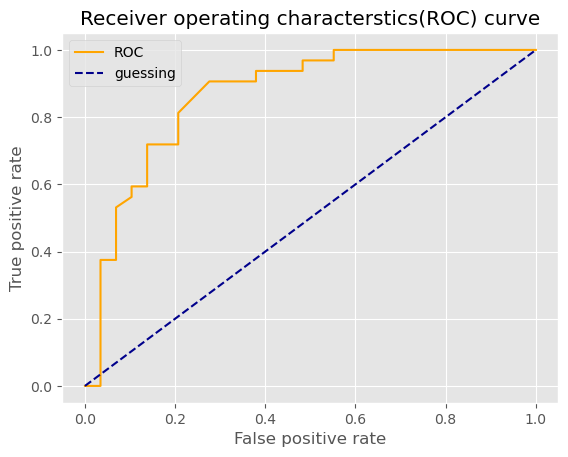

In [113]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):

    """
    plots a roc curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model"""

    # Plot roc curve
    plt.plot(fpr,tpr,color='orange',label='ROC')
    # plot l90ine with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='guessing')

    # customize the plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver operating characterstics(ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)
    

In [114]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

np.float64(0.8669181034482759)

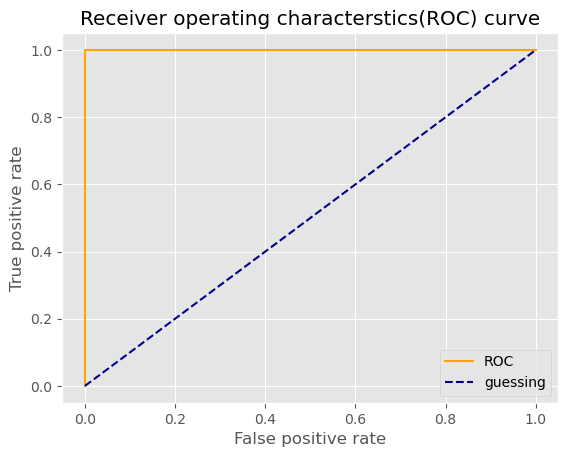

In [115]:
# lets plot the perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [116]:
# Perfect AUC score 
roc_auc_score(y_test,y_test)

np.float64(1.0)

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix

A confusion matrix is a quik way to compare the labels a model predicts and the actual label it was supposed to predit

in essence , this gives an idea of where the model is getting confused
<img src="img/confusion_matrix_anatomy.png" alt= Confusion_matrix_anatomy >

In [117]:

# confusion matrix https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
y_preds= clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [118]:
"""
the most ideal we want the values to be is at diagonal
because it means our valuse allign with the predicted and the actual labels"""

pd.crosstab(y_test,y_preds,
           rownames=["Actual label"],
           colnames=["Predicted label"])


Predicted label,0,1
Actual label,,
0,23,6
1,6,26


### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matrix

In [119]:
clf

RandomForestClassifier()

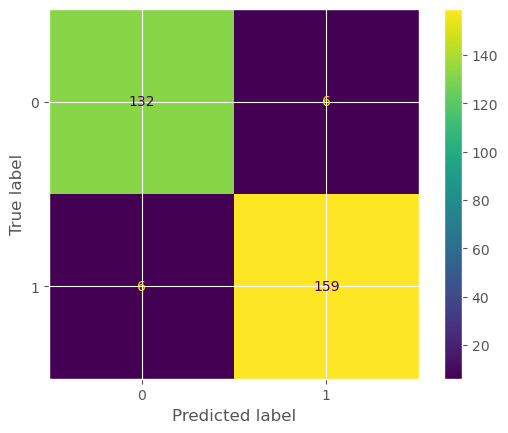

In [120]:
# from sklearn.metrics import ConfusionMatrixDisplay

# ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X,y=y)
# #plt.show()
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Clear any previous open figures
plt.close('all')

# Plot and store in variable
disp =ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X,y=y)

# Show only the current one
plt.show()

# Optional: close again
plt.close('all')


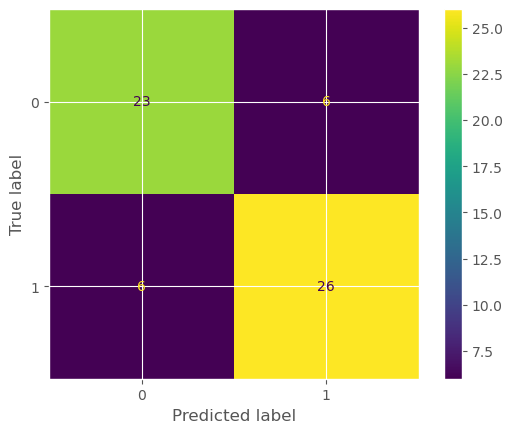

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Clear any previous open figures
plt.close('all')

# Plot and store in variable
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

# Show only the current one
plt.show()

# Optional: close again
plt.close('all')
 

**Classification Report**

<img src ="img/classification_report_anatomy.png" alt= classification_report_anatomy>

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



**More on model evaluation metrics**

https://scikit-learn.org/stable/modules/model_evaluation.html

In [123]:
# where precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0]=1 #only one positive case

disease_preds=np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                  output_dict=True))

C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation -
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

topics to be covered-
1. R^2 (Coefficient of determination)
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

<img src="img/regression_metrics.png">

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

**R^2**

What R-squared does: Compares your model predictions to the mean of the targets.Values can range from negative infinity(a very poor model ) to 1.For example, if all your model does is predict the means of the targets,it's R^2 value would be 0.And if your model perfectly predicts a range of numbers it's R^2
value would be 1


In [124]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [125]:
model.score(X_test,y_test)

0.806652667101436

In [126]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [127]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [128]:
y_test.mean()

np.float64(2.0550030959302323)

In [129]:
from sklearn.metrics import r2_score

# fill an array with y_test mean

y_test_mean = np.full(len(y_test),y_test.mean()) # numpy creante a full array with length y_test with values y_test.mean()


In [130]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [131]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [132]:
  r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute difference between predictions and actual values.
It gives us the idea of how wrong aur models are.

In [133]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)

mae

0.32656738464147306

In [134]:
df=pd.DataFrame({"actual values":y_test,
                "predicted values":y_preds})
df["differences"]=df["predicted values"]-df["actual values"]

df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.660220,0.073220
7113,1.98200,2.343100,0.361100
7668,1.57500,1.663110,0.088110
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [135]:
np.abs(df["differences"]).mean()

np.float64(0.32656738464147306)

**Mean Squared Error (MSE)**

The mean squared error function computes mean squared error, a risk metrics corresponding to the expected value of the squared (quadratic) error or loss

Taking the square root of the MSE, called the root mean squared error (RMSE), is another common metric that provides a measure in the same units as the target variable. RMSE is available through the root_mean_squared_error function.

In [136]:
from sklearn. metrics import mean_squared_error

y_preds=model.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.25336408094921037

In [137]:
df["squared_differences"]=np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,0.000286
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919


In [138]:
# calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

np.float64(0.25336408094921037)

In [139]:
df.head

<bound method NDFrame.head of        actual values  predicted values  differences  squared_differences
20046        0.47700          0.493900     0.016900             0.000286
3024         0.45800          0.754940     0.296940             0.088173
15663        5.00001          4.928596    -0.071414             0.005100
20484        2.18600          2.540240     0.354240             0.125486
9814         2.78000          2.331760    -0.448240             0.200919
...              ...               ...          ...                  ...
15362        2.63300          2.219830    -0.413170             0.170709
16623        2.66800          1.947760    -0.720240             0.518746
18086        5.00001          4.836378    -0.163632             0.026775
2144         0.72300          0.717820    -0.005180             0.000027
3665         1.51500          1.677810     0.162810             0.026507

[4128 rows x 4 columns]>

In [140]:
df = df.drop('squared_differences', axis=1)


In [141]:
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240


In [142]:
df_large=df.copy()

In [143]:
df_large

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.219830,-0.413170
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [144]:
df_large.loc[20046, "squared differences"] = 16


In [145]:
df_large.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493900,0.016900,16.0
3024,0.45800,0.754940,0.296940,NaN
15663,5.00001,4.928596,-0.071414,NaN
20484,2.18600,2.540240,0.354240,NaN
9814,2.78000,2.331760,-0.448240,NaN


In [146]:
print(df_large.index) 

Index([20046,  3024, 15663, 20484,  9814, 13311,  7113,  7668, 18246,  5723,
       ...
        4653,  1783,  7608,     0, 10155, 15362, 16623, 18086,  2144,  3665],
      dtype='int64', length=4128)


In [147]:
# calculate MSE with large_error
df_large["squared differences"].mean()

np.float64(16.0)

### 4.2.3 Finally using the 'scoring' parameter

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()


In [149]:
np.random.seed(42)

#cross-validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None) #if scoring =  None ,estimator's default scoring evaluation metric is used which is accuracy for classification model 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [150]:
# cross-validated accuracy
print(f"The cross-validated score is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated score is: 82.48%


In [151]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [152]:
print(f"The cross-validated score is: {np.mean(cv_acc)*100:.2f}%")


The cross-validated score is: 82.48%


In [153]:
#precision  
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [154]:
print(f"The cross-validated score is: {np.mean(cv_precision):.2f}")

The cross-validated score is: 0.83


In [155]:
# recall 
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [156]:
#cross-validated recall

print(f"The cross-validated score is: {np.mean(cv_recall)}")

The cross-validated score is: 0.8545454545454545


Let's see the scoring parameter being used using for a regression model

In [157]:
#F1 score
np.random.seed(42)
cv_F1_score=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_F1_score


array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [158]:
print(f"The cross-validated score is: {np.mean(cv_F1_score)}")

The cross-validated score is: 0.8426854603423344


Let's see the scoring parameter being used for regression problem

In [159]:
from sklearn.model_selection import cross_val_score 
from catboost import CatBoostRegressor

np.random.seed()

X=boston_housing.drop("MEDV",axis=1)
y=boston_housing['MEDV']

#Since CatBoost is verbose by default, it prints training info for each fold.
#to supress it verbose=0
model=CatBoostRegressor(verbose=0)





In [160]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_r2)



np.float64(0.667772388645185)

**All scorer objects follow the convention that higher return values are better than lower return values
 thus metrics that measure the distance between the model and the data,like metrics.mean_squared_error are avalilble as neg_mean_squared_error,which return the negated value of the metric**



In [161]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [162]:
np.random.seed(42)
cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

np.float64(-3.0312352552902335)

In [163]:
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [164]:
np.random.seed(42)
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

np.float64(-21.261442856882137)

In [165]:
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

## 4.3 Using different evaluation metrics as scikit as Scikit-learn Functions

The third  way to evaluate scikit-learn machine  learning models/estimators is to using the sklearn.metrics module-
https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

In [166]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

y_preds=clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")



Classifier metrics on the test set
Accuracy: 80.33%
Precision: 0.8125
Recall: 0.8125
F1: 0.8125


In [167]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)

y_preds=model.predict(X_test)

print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")
print(f"RMSE: {root_mean_squared_error(y_test,y_preds)}")


Regression metrics on the test set
R2 score: 0.8020074166439581
MAE: 0.3275013055959304
MSE: 0.2593605384621848
RMSE: 0.5092745217092495


## 5. Improving the model

First predictions= baseline predictions
First model= baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data,the better) 
* Could we imporve the data?

From a model perspective:
* Is there a better model that we can use
* Could we improve the current model?

Parameters = model find these patterns in the data

Hyperparameters=settings on a model you can adjust to (potentially) improve
its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


<img src = "img/most_impt.png">

In [168]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [169]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

 ### 5.1 Tuning hyperparameters by hand

 Let's make 3 sets, training,validation and test

 <img src="img/impt_cncpt.png">
 

In [170]:
 clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* max_depth
* max_features
* min_samples leaf
* min_samples_split
* n_estimators

In [180]:
def evaluate_preds(y_true,y_preds):
    """
    performs evaluation comparision on y_true labels vs. y_pred labels
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision= precision_score(y_true,y_preds)
    recall =recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                "precision":round(precision,2),
                "recall":round(recall,2),
                "F1":round(f1,2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict 
    
    

In [181]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data (so that aur training and test splits data are not in the order that they came from)
heart_disease_shuffled= heart_disease.sample(frac=1)

#split into X and y

X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#split the data into train,validation & test sets
train_split= round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split=round(train_split+0.15 *len(heart_disease_shuffled)) # 15% of data

X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[:valid_split]

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds=clf.predict(X_valid)

# Evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics


Acc: 82.22%
Precision: 81.48%
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'F1': 0.85}

In [182]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
#  MAX_DEPTH=The maximum depth of the tree.
#If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

clf_2=RandomForestClassifier(n_estimators=200,
                            max_depth=10)
clf_2.fit(X_train,y_train)
y_preds_2=clf_2.predict(X_valid)
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
Precision: 81.48%
Recall: 0.88
F1 score: 0.85


### 5.2 Hyperparameter tuning with RandomizedSearchCV




In [187]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[100,200,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# split into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#split into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate RandomForestClassifier
#n_jobs stand for how much of your computer processor you want to dedicate to this machine learning model
#-1 means all of it
clf= RandomForestClassifier(n_jobs= 1)

# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2)

#Fit the RandomizedSearchCV
rs_clf.fit(X_train,y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200

C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\base.py"

In [188]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [189]:
# Make predictions with the best hyperparameters

rs_y_preds=rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 83.61%
Precision: 78.12%
Recall: 0.89
F1 score: 0.83


### 5.3 Hyperparameter tuning with gridSearchCv

GridSearchCV:

* trains your model with every combination of those parameters
* uses cross-validation for each
* It returns the best set of parameters and the best trained model.

If your grid has 3 × 3 × 2 = 18 combinations and you use 5-fold CV, then:

* It trains 18 × 5 = 90 models
* Automatically compares and picks the best one

not recomended for large dataset and a laptop

In [190]:
grid

{'n_estimators': [100, 200, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [191]:
 # reducing the search space in comparision of best parameters

grid_2 = {'n_estimators': [200, 300, 500, ],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [ 6],
         'min_samples_leaf': [1, 2]}

In [192]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)
# split into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#split into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate RandomForestClassifier
#n_jobs stand for how much of your computer processor you want to dedicate to this machine learning model
#-1 means all of it
clf= RandomForestClassifier(n_jobs= 1)

# setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

#Fit the GridSearchCV
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\quick\Desktop\ML-101\env\Lib\site-packages\sklearn\base.py"

In [193]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [194]:
# Make predictions with the best hyperparameters

gs_y_preds=gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 83.61%
Precision: 76.47%
Recall: 0.93
F1 score: 0.84


Let's compare our different models metrics


In [200]:
compare_metrics =pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "random search":rs_metrics,
                              "grid search":gs_metrics})

x=compare_metrics.plot.bar(figsize=(10,8))

                         
                         

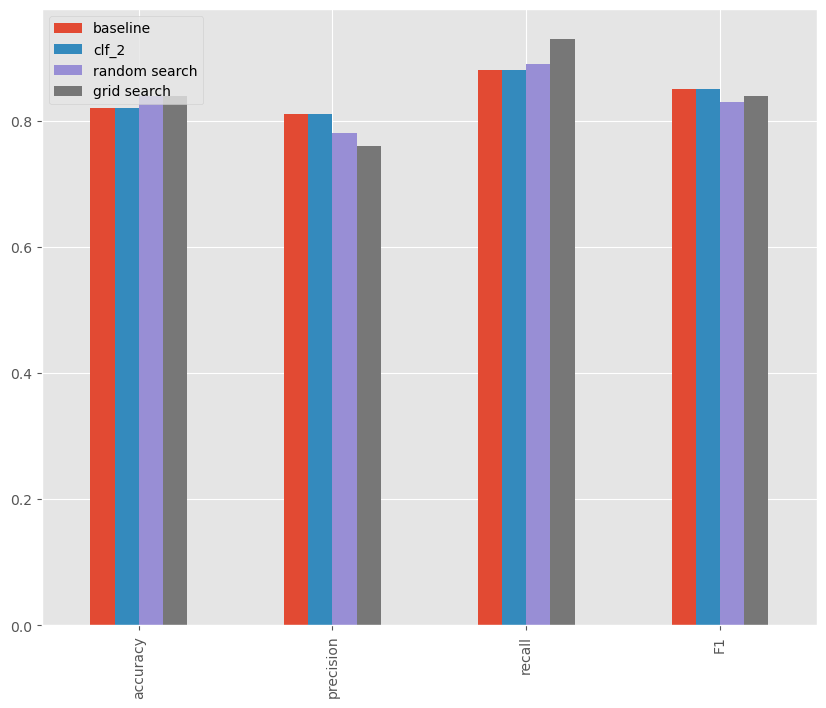

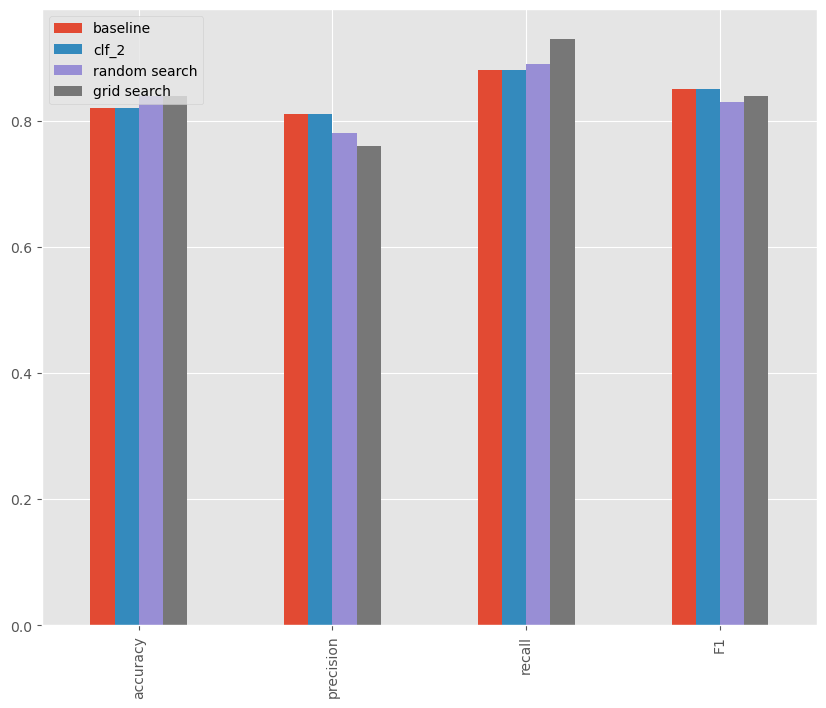

In [202]:
plt.show(x)

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's 'pickle' module
2. With the 'joblib' module

**Pickle**

In [204]:
import pickle

#save an existing model to file
pickle.dump(gs_clf,open("gs_random_random_forest_model_1.pkl","wb"))

In [205]:
# Load the saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl","rb"))

In [207]:
# make some predictions
#model = loaded_pickle_model

**Joblib**

In [209]:
from joblib import dump,load

#Save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [212]:
# Import a saved joblib model
loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [213]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 76.47%
Recall: 0.93
F1 score: 0.84


{'accuracy': 0.84, 'precision': 0.76, 'recall': 0.93, 'F1': 0.84}

## 7.Putting it all together!

In [214]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [215]:

data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [216]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [217]:
# Getting data ready
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test) 

0.22188417408787875

It's also possible to use GridSearchCV or RandomizedSesrchCV with our Pipeline.

In [222]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [223]:
gs_model.score(X_test, y_test)

0.2848784564026805